# TEMP will replace sandpile.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sandpile_model import Sandpile_model
from plots import plot_time_series, plot_size_probability

In [2]:
# Run cell to increase font sizes. Useful when saving plots
SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (8,6)

In [3]:
def get_tau_results(grain_tresholds, **kwargs):

    results = np.zeros((len(grain_tresholds), len(grain_tresholds)))

    # Since the results are symmetric not all possibilies need to be tested
    # eg. the tresholds (1, 2) and (2, 1) should give the same results
    for i, grain_treshold1 in enumerate(grain_tresholds):

        for j, grain_treshold2 in enumerate(grain_tresholds[:i + 1]):
            
            model = Sandpile_model(crit_values=[grain_treshold1, grain_treshold2], n_grain_types=2, **kwargs)
            model.load_or_run()

            xdata, ydata = model.collect_size_probability_data(n_bins=100)
            popt, pcov = model.calc_fit_parameters(xdata, ydata)

            results[i][j] = popt[0]

    # Fill the results which previously have been skipped
    return mirror_matrix(results)

def mirror_matrix(matrix):
    """
    Mirror a matrix around the diagonal. The matrix needs have values in the lower
    left triangle like:

    A = (a, 0, 0, 0)
        (b, c, 0, 0)
        (d, e, f, 0)
        (g, h, i, j)
    """
    
    return np.maximum(matrix, matrix.transpose())

def plot_tau_results(grain_tresholds, results, title=""):
    
    plt.contourf(grain_tresholds, grain_tresholds, results)

    plt.xlabel("Treshold 1")
    plt.ylabel("Treshold 2")

    if title:
        plt.title(title)
        
    plt.colorbar()

    plt.show()

Loading data data_N_10000_GS_16_n_2_GO_[0.5, 0.5]_CR_[2, 2]_ADD_random_INIT_random_B_False...


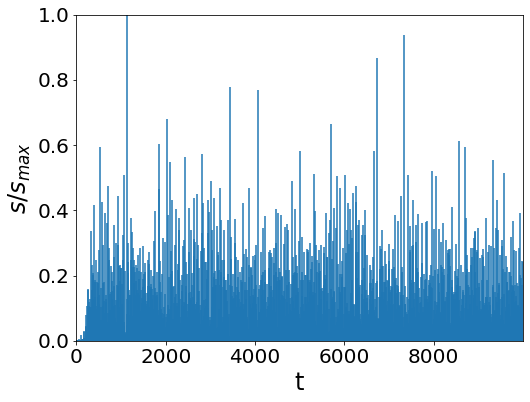

In [4]:
# Example time series for low steps, otherwise small avalanches can not be seen

model = Sandpile_model(grid_size=16, n_steps=10000, crit_values=[2, 2], add_method="random")
model.load_or_run()
model.plot_time_series()

# Initially small avalanche sizes, due to the random initial configuration.
# The addition of grains causes local critical states, resulting in small
# avalanches. Over time the system evolves towards a larger critical states
# and thus larger avalanches 

Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[2, 4]_ADD_random_INIT_random_B_False...


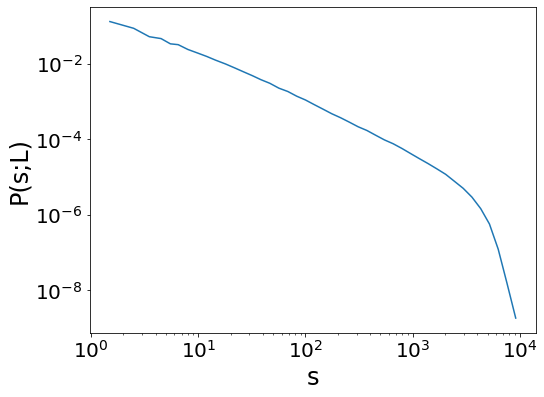

In [5]:
# Example avalanche distribution

model = Sandpile_model(grid_size=32, n_steps=1000000, crit_values=[2, 4], add_method="random")
model.load_or_run()
model.plot_size_probability(n_bins=50, show_fit=False)

# The avalanche distribution initially follows a powerlaw distribution,
# but due to the limited size an exponential falloff is observed.

In [ ]:
# Avalanche distribution for multiple grid sizes

grid_sizes = np.logspace(4, 10, base=2, num=7, dtype=int)
N_STEPS = 1000000

size_probability_dataset = []
labels = []

for grid_size in grid_sizes:

    model = Sandpile_model(grid_size=grid_size, n_steps=1000000, crit_values=[2, 4], n_grain_types=2, init_method="random", add_method="random")
    model.load_or_run()

    xdata, ydata = model.collect_size_probability_data(n_bins=100)
        
        
    size_probability_dataset.append((xdata, ydata))
    labels.append(f"Size: {grid_size}")

plot_size_probability(size_probability_dataset, labels=labels)

# Each instance has the same powerlaw distribution, but due to the different sizes,
# different exponential falloffs are observed.

Loading data data_N_1000000_GS_128_n_2_GO_[0.5, 0.5]_CR_[2, 4]_ADD_random_INIT_random_B_False...


c:\Users\vansa\Persoonlijk\MSc Compuational Science\Complex System Simulation\Sandpile\sandpile_model.py:26: RuntimeWarning: invalid value encountered in log
  return np.log(fit_func(x, tau, a, C))


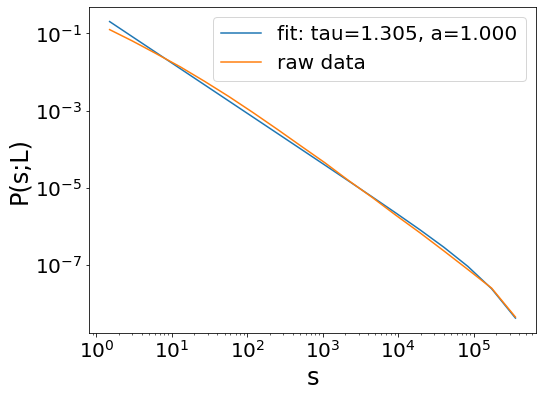

In [6]:
# Example fitting against avalanche distribution

model = Sandpile_model(grid_size=128, n_steps=1000000, crit_values=[2, 4], add_method="random")
model.load_or_run()
model.plot_size_probability() # TODO Play with n_bins

# The normalized powerlaw-exponential falloff fit function is a great fit against the data

Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[1, 1]_ADD_random_INIT_random_B_False...


c:\Users\vansa\Persoonlijk\MSc Compuational Science\Complex System Simulation\Sandpile\sandpile_model.py:26: RuntimeWarning: invalid value encountered in log
  return np.log(fit_func(x, tau, a, C))


Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[2, 1]_ADD_random_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[2, 2]_ADD_random_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[3, 1]_ADD_random_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[3, 2]_ADD_random_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[3, 3]_ADD_random_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[4, 1]_ADD_random_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[4, 2]_ADD_random_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[4, 3]_ADD_random_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[4, 4]_ADD_random_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[5, 1]_ADD_random_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO

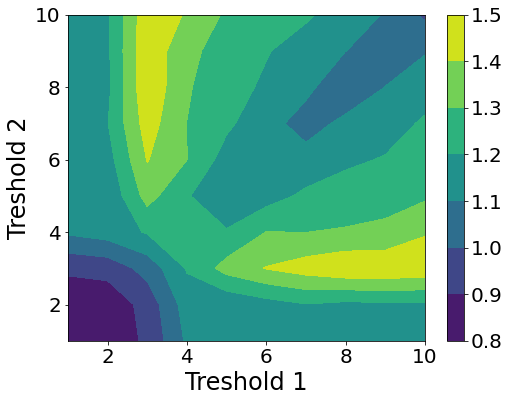

In [7]:
# Plot tau as a function of two grain tresholds for add_method="random"

grain_tresholds = np.arange(1, 11, 1)
results = get_tau_results(grain_tresholds, grid_size=32, n_steps=1000000, add_method="random")
plot_tau_results(grain_tresholds, results)

Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[1, 1]_ADD_position_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[2, 1]_ADD_position_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[2, 2]_ADD_position_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[3, 1]_ADD_position_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[3, 2]_ADD_position_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[3, 3]_ADD_position_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[4, 1]_ADD_position_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[4, 2]_ADD_position_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[4, 3]_ADD_position_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[4, 4]_ADD_position_INIT_random_B_False...
Loading data data_N_

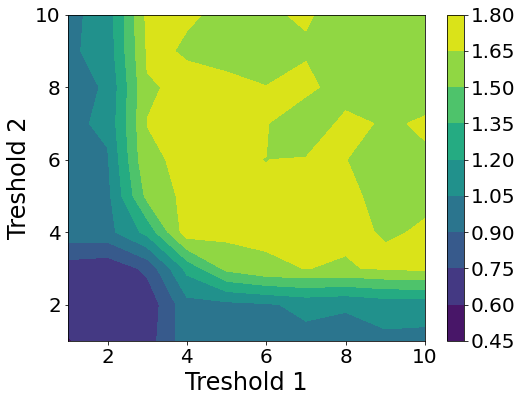

In [8]:
# Plot tau as a function of two grain tresholds for add_method="random"

grain_tresholds = np.arange(1, 11, 1)
results = get_tau_results(grain_tresholds, grid_size=32, n_steps=1000000, add_method="position")
plot_tau_results(grain_tresholds, results)

Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[1, 1]_ADD_normal_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[2, 1]_ADD_normal_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[2, 2]_ADD_normal_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[3, 1]_ADD_normal_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[3, 2]_ADD_normal_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[3, 3]_ADD_normal_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[4, 1]_ADD_normal_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[4, 2]_ADD_normal_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[4, 3]_ADD_normal_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO_[0.5, 0.5]_CR_[4, 4]_ADD_normal_INIT_random_B_False...
Loading data data_N_1000000_GS_32_n_2_GO

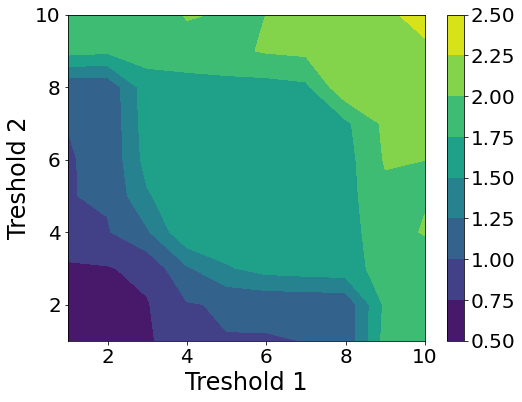

In [9]:
# Plot tau as a function of two grain tresholds for add_method="random"

grain_tresholds = np.arange(1, 11, 1)
results = get_tau_results(grain_tresholds, grid_size=32, n_steps=1000000, add_method="normal")
plot_tau_results(grain_tresholds, results)